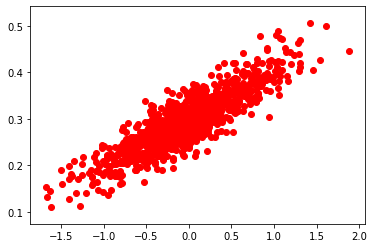

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 随机生成1000个点，围绕在y=0.1x+0.3的直线周围
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1*0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1,y1])

# 生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.scatter(x_data,y_data, c='r')
plt.show()

In [12]:
# 生成1维的W矩阵，取值是[-1,1]之间的随机数
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0),name="W")
# 生成1维的b矩阵，初始值为0
b = tf.Variable(tf.zeros([1]),name='b')
# 经过计算得出预估值y
y = W*x_data + b

#以预估值y和实际值y_data之间的均方误差作为损失
loss = tf.reduce_mean(tf.square(y-y_data),name='loss')
#采用梯度下降法来优化参数
optimizer = tf.train.GradientDescentOptimizer(0.5)
#训练的过程就是最小化这个误差值
train = optimizer.minimize(loss,name='train')

init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

# 初始化的W和b是多少
print('W=',sess.run(W),'b=',sess.run(b),'loss',sess.run(loss))
for i in range(20):
    sess.run(train)
    print('W=',sess.run(W),'b=',sess.run(b),'loss',sess.run(loss))

W= [-0.6327827] b= [0.] loss 0.24394564
W= [-0.41767165] b= [0.2850554] loss 0.08173372
W= [-0.26188046] b= [0.28916043] loss 0.040457476
W= [-0.15291221] b= [0.29213345] loss 0.020262832
W= [-0.07669236] b= [0.29421294] loss 0.010382483
W= [-0.02337897] b= [0.29566747] loss 0.0055484576
W= [0.01391206] b= [0.29668486] loss 0.0031833826
W= [0.03999596] b= [0.29739648] loss 0.0020262552
W= [0.05824082] b= [0.29789427] loss 0.0014601231
W= [0.07100253] b= [0.29824242] loss 0.0011831399
W= [0.07992893] b= [0.29848596] loss 0.0010476242
W= [0.08617268] b= [0.2986563] loss 0.0009813221
W= [0.09053998] b= [0.29877546] loss 0.00094888365
W= [0.09359477] b= [0.2988588] loss 0.0009330128
W= [0.0957315] b= [0.2989171] loss 0.00092524773
W= [0.09722607] b= [0.29895788] loss 0.0009214488
W= [0.09827147] b= [0.2989864] loss 0.0009195902
W= [0.0990027] b= [0.29900634] loss 0.0009186808
W= [0.09951418] b= [0.2990203] loss 0.0009182358
W= [0.09987194] b= [0.29903007] loss 0.0009180181
W= [0.10012218] 

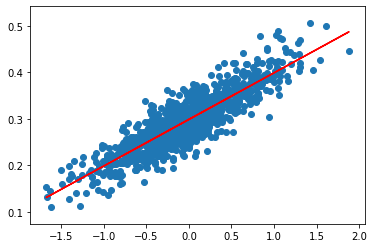

In [14]:
plt.scatter(x_data,y_data)
plt.plot(x_data,sess.run(W)*x_data+sess.run(b),c='r')
plt.show()